# Practice, Play & Cool Code

## Imports
__Stays at the top of the notebook__

- ⌃O = Create new cell above
- ⌘2 = Make cell Markdown


- ⌘ is command
- ⌥ is option
- ⌃ is control
- ⇧ is shift
- ⇪ is caps lock
- ⇥ is tab


- (⇧ ⇥) shift + tab in a function parenthesis, to view pop up for the function attributes. 

In [1]:
import re 
import nltk
import torch

import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from pathlib import Path
from tqdm import tqdm
from time import sleep
from collections import Counter
from pprint import pprint as p2

In [2]:
d = 2.5 * np.random.randn(10, 4) + 3
l = ['word', 'list', 'heath', 'four', 'mars', 'road', 'seven', 'eight', 'home', 'ten']
h = pd.DataFrame(data=d, index=l)
s = 0.6
l = int(len(h) * s)

# Factorials

In [3]:
from math import factorial

factorial(9) / factorial(10)

0.1

# Accuracy, Precision & Recall

In [4]:
# The Medical Model - High Recal (Find all sick people, it's ok if not all labeld sick are actually sick.)
# Spam Detector - High Precision (Some spam better than labeling a good email as spam.

# Accuracy - Out of all the predictions, what percentage did we classify correctly?
# Precision - Out of our positive predictions, what percentage did we classify correctly as positive?
# Recall - Out of the actual positive labeld data, what percentage did we correctly predict?

# 2d_array_shape = [[true_positive, false_positive], [true_negative, false_negative]]

medical = [[1000, 800], [9000, 200]]
email = [[100, 30], [700, 170]]
points = [[6, 2], [5, 1]]

def apr(confusion_matrix):
    cm = pd.DataFrame(confusion_matrix, index=[
                                    'Positive', 'Negative'], columns=['True', 'False'])
    print(cm.head())
    print(' ')
    
    tp = cm.iloc[0, 0]
    fp = cm.iloc[0, 1]
    tn = cm.iloc[1, 0]
    fn = cm.iloc[1, 1]
    
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    print(f'Accuracy: {accuracy:.2%}')

    precision = tp / (tp + fp)
    print(f'Precision: {precision:.2%}')

    recall = tp / (fn + tp) # How many of the positve points where caught.
    print(f'Recall: {recall:.2%}')
    print('-'*21 + '\n')
    
for i in [medical, email, points]:
    apr(i)

          True  False
Positive  1000    800
Negative  9000    200
 
Accuracy: 90.91%
Precision: 55.56%
Recall: 83.33%
---------------------

          True  False
Positive   100     30
Negative   700    170
 
Accuracy: 80.00%
Precision: 76.92%
Recall: 37.04%
---------------------

          True  False
Positive     6      2
Negative     5      1
 
Accuracy: 78.57%
Precision: 75.00%
Recall: 85.71%
---------------------



# Gini Impurity

In [18]:
# L16S19 This code needs to be updated.


In [19]:
dots = pd.DataFrame([[8, 2], [2, 8]], columns=['blue', 'red'])
print(dots)
print(dots.groupby('blue').size().div(len(dots)))
print(dots.values)

   blue  red
0     8    2
1     2    8
blue
2    0.5
8    0.5
dtype: float64
[[8 2]
 [2 8]]


# Entropy

In [85]:
def simple_entropy(red=8, blue=2):
    # Red or Blue Selection Game (L16S9-S13)
    p1 = red/(red+blue) # Probability 1 picking a red
    p2 = blue/(red+blue) # Probability 2 picking a blue

    ent = -(p1*np.log2(p1))-(p2*np.log2(p2))
    return ent


# Multi-class Function for Entropy
def multi_entropy(p_clss):
    total = np.sum(p_clss)
    ent = 0
    for cls in p_clss:
        p = cls/total
        ent += -(p*np.log2(p))
    return ent

#print(simple_entropy())
s = [4]
w = [3, 3, 1]
print(multi_entropy(s))
print(multi_entropy(w))


0.0
1.4488156357251847


# Information Gain

In [74]:
# Information is the inverse of entropy
# To find infomration gain in a tree; 
    # Find the entropy of the parent and the average entropy of the children.
    # The informatino gain is the difference between the parent and the mean of the children.
    # info_gain = Ep - mean(Ec1 + Ec2 + Ecn)
bugs = pd.read_csv('data/ml-bugs.csv')


def info_gain(s):
    s_mean = s.mean()
    s_total = s.sum()
    gain = s_total - s_mean
    print(
        f'Mean:{s_mean:.3f} - Total:{s_total:.3f} = Information Gain:{gain:.3f}'
    )
    return gain
split_species = bugs.groupby('Species').size().div(len(bugs))
split_color = bugs.groupby('Color').size().div(len(bugs))
split_length = bugs.groupby('Length (mm)').size().div(len(bugs))

for i in [split_species, split_color, split_length]:
    info_gain(i)

print(split_species)
# print(bugs)


def two_group_ent(first, tot):
    return -(first / tot * np.log2(first / tot) +
             (tot - first) / tot * np.log2((tot - first) / tot))


tot_ent = two_group_ent(10, 24)
g17_ent = 15 / 24 * two_group_ent(11, 15) + 9 / 24 * two_group_ent(6, 9)

answer = tot_ent - g17_ent
print(answer)
print('-' * 20 + '\n')
print(bugs)

Mean:0.500 - Total:1.000 = Information Gain:0.500
Mean:0.333 - Total:1.000 = Information Gain:0.667
Mean:0.042 - Total:1.000 = Information Gain:0.958
Species
Lobug    0.583333
Mobug    0.416667
dtype: float64
0.11260735516748954
--------------------

   Species  Color  Length (mm)
0    Mobug  Brown         11.6
1    Mobug   Blue         16.3
2    Lobug   Blue         15.1
3    Lobug  Green         23.7
4    Lobug   Blue         18.4
5    Lobug  Brown         17.1
6    Mobug  Brown         15.7
7    Lobug  Green         18.6
8    Lobug   Blue         22.9
9    Lobug   Blue         21.0
10   Lobug   Blue         20.5
11   Mobug  Green         21.2
12   Mobug  Brown         13.8
13   Lobug   Blue         14.5
14   Lobug  Green         24.8
15   Mobug  Brown         18.2
16   Lobug  Green         17.9
17   Lobug  Green         22.7
18   Mobug  Green         19.9
19   Mobug   Blue         14.6
20   Mobug   Blue         19.2
21   Lobug  Brown         14.1
22   Lobug  Green         18.8
23   

# Save a Numpy Array to a Text File

In [6]:
x = np.arange(0.0,5.0,1.0)
p2(x)
# This is a nice function to remeber:
np.savetxt('test.out', x, delimiter=',')

array([0., 1., 2., 3., 4.])


# PyTorch Shape & Squeeze

In [96]:
m = torch.nn.LogSoftmax(dim=1)
input = torch.randn(2, 3)
print(input.shape[0])
print(input.flatten())
u = input.numpy()
# output = m(input)
# print(output)

2
tensor([ 0.2917,  1.3186,  1.3929, -0.9426, -1.3223, -0.0747])


In [67]:
l = [9.2120e-06,  1.4736e-03,  1.5639e-03,  8.9667e-01,  1.0028e-01]
for n in l:
    print(n)
t = torch.ones(4, 3)
print(t)
print(t.shape[0])
h = t.reshape(1, -1)
print(h)

g = h.squeeze()
print(g)

9.212e-06
0.0014736
0.0015639
0.89667
0.10028
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
4
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


# Bag of WordS

In [31]:
tokenized = [['great', 'buy', 'at', 'ill', 'wait'], [], ['for', 'jefferies', 'maintains', 'with', 'rating', 'of', 'hold', 'setting', 'target', 'price', 'at', 'usd', 'our', 'own', 'verdict', 'is', 'buy'], ['heard', 'there', 'guy', 'who', 'know', 'someone', 'who', 'think', 'somebody', 'know', 'something', 'on', 'stocktwits'], ['reveal', 'yourself'], ['why', 'the', 'drop', 'warren', 'buffet', 'taking', 'out', 'his', 'position'], ['bear', 'have', 'reason', 'on', 'to', 'pay', 'more', 'attention'], ['ok', 'good', 'we', 're', 'not', 'dropping', 'in', 'price', 'over', 'the', 'weekend', 'lol'], ['daily', 'chart', 'we', 'need', 'to', 'get', 'back', 'to', 'above'], ['drop', 'per', 'week', 'after', 'spike', 'if', 'no', 'news', 'in', 'month', 'back', 'to', 'if', 'bo', 'then', 'bingo', 'what', 'is', 'the', 'odds']]

words = []

for msg in tokenized:
    words += msg
    
def bag_of_words(words):
    """Create a vocabulary by using Bag of words
    """
    bow = Counter()
    
    for word in words:
        bow[word] += 1
    return bow

bow = bag_of_words(words)
print(bow['great'])
print(list(bow.elements()))

1
['great', 'buy', 'buy', 'at', 'at', 'ill', 'wait', 'for', 'jefferies', 'maintains', 'with', 'rating', 'of', 'hold', 'setting', 'target', 'price', 'price', 'usd', 'our', 'own', 'verdict', 'is', 'is', 'heard', 'there', 'guy', 'who', 'who', 'know', 'know', 'someone', 'think', 'somebody', 'something', 'on', 'on', 'stocktwits', 'reveal', 'yourself', 'why', 'the', 'the', 'the', 'drop', 'drop', 'warren', 'buffet', 'taking', 'out', 'his', 'position', 'bear', 'have', 'reason', 'to', 'to', 'to', 'to', 'pay', 'more', 'attention', 'ok', 'good', 'we', 'we', 're', 'not', 'dropping', 'in', 'in', 'over', 'weekend', 'lol', 'daily', 'chart', 'need', 'get', 'back', 'back', 'above', 'per', 'week', 'after', 'spike', 'if', 'if', 'no', 'news', 'month', 'bo', 'then', 'bingo', 'what', 'odds']


# Collections Counter

In [52]:
paragraph = 'Just a day after Trump descended on Capitol Hill with a grandiose appeal to dive back into the contentious health care fight, aides and members who lived a year-long stall out were scratching their heads, grappling with what another run at health care would even look like in the era of a Democratic-controlled House and what it could cost them in the next election.'
words = paragraph.split(' ')
counts = Counter(words)
com = counts.most_common(4)

print('\n' + '-'*15 + '\n')
print(counts)
print('\n' + '-'*15 + '\n')
print(com)
print('\n' + '-'*15 + '\n')
print(dir(com))
print('\n' + '-'*15 + '\n')


---------------

Counter({'a': 4, 'the': 3, 'with': 2, 'health': 2, 'care': 2, 'and': 2, 'what': 2, 'in': 2, 'Just': 1, 'day': 1, 'after': 1, 'Trump': 1, 'descended': 1, 'on': 1, 'Capitol': 1, 'Hill': 1, 'grandiose': 1, 'appeal': 1, 'to': 1, 'dive': 1, 'back': 1, 'into': 1, 'contentious': 1, 'fight,': 1, 'aides': 1, 'members': 1, 'who': 1, 'lived': 1, 'year-long': 1, 'stall': 1, 'out': 1, 'were': 1, 'scratching': 1, 'their': 1, 'heads,': 1, 'grappling': 1, 'another': 1, 'run': 1, 'at': 1, 'would': 1, 'even': 1, 'look': 1, 'like': 1, 'era': 1, 'of': 1, 'Democratic-controlled': 1, 'House': 1, 'it': 1, 'could': 1, 'cost': 1, 'them': 1, 'next': 1, 'election.': 1})

---------------

[('a', 4), ('the', 3), ('with', 2), ('health', 2)]

---------------

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '_

# Evenly Spaced Numbers with NumPy

In [13]:
print(np.linspace(0, np.pi, 21))

[0.         0.15707963 0.31415927 0.4712389  0.62831853 0.78539816
 0.9424778  1.09955743 1.25663706 1.41371669 1.57079633 1.72787596
 1.88495559 2.04203522 2.19911486 2.35619449 2.51327412 2.67035376
 2.82743339 2.98451302 3.14159265]


# TQDM Progress Meter

In [57]:
tr = tqdm(range(15), desc='1st Loop')
for i in tr:
    # jr = trange(4, desc='2nd Loop', leave=False)
    for j in range(4):
        sleep(0.01)

1st Loop: 100%|██████████| 15/15 [00:00<00:00, 21.85it/s]


# Numpy Random Seed

In [36]:
np.random.seed(7)
ar = np.random.randint(0, 100, size=(3, 4))
c = 0
r = 2

print(ar)
print('-'*20)
print(f'Column {c}: {ar[c,:]}') # Selects a row
print(f'Row {r}: {ar[:,r]}') # Selects a column

[[47 68 25 67]
 [83 23 92 57]
 [14 23 72 89]]
--------------------
Column 0: [47 68 25 67]
Row 2: [25 92 72]


# Display an image with matplotlib.pyplot

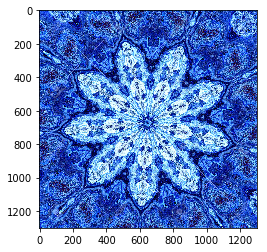

In [59]:
# https://matplotlib.org/users/image_tutorial.html
img = mpimg.imread('images/blue-fractal.jpg')
plt.imshow(img)

In [60]:
print(img[:2])

[[[ 46  98 255]
  [ 18  66 238]
  [  0  29 213]
  ...
  [ 13  35 170]
  [ 23  45 180]
  [ 19  41 178]]

 [[ 35  92 243]
  [ 33  86 244]
  [ 18  64 235]
  ...
  [  0  22 136]
  [ 54  84 198]
  [ 26  55 172]]]


# Sigmoid function

In [61]:
a = 0.7 + 0.8

def sig(x):
    return (np.e**x) / ((np.e**x) + 1)

print(sig(a))

0.8175744761936437


# Cross entropy

In [62]:
# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

y = [0, 0, 1]
p = [0.8, 0.7, 0.1]

print(cross_entropy(y, p))

5.115995809754082


In [63]:
# We use the natural logarithm, base e instead of base 10.  e = 2.718281828459045

a = 3
b = 7

if np.log(a*b) == (np.log(a) + np.log(b)):
    print(f"Holly Cow! {np.log(a*b)} is equal to {np.log(a) + np.log(b)}")

Holly Cow! 3.044522437723423 is equal to 3.044522437723423


In [64]:
%run -i 'lesson_notebooks/l8/perceptron/perceptron.py'

# The NOT Perceptron

In [65]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -1.0
bias = 0.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.0                    1          Yes
       0          1                  -1.0                    0          Yes
       1          0                   0.0                    1          Yes
       1          1                  -1.0                    0          Yes


# The AND Perceptron

In [66]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -2.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -2.0                    0          Yes
       0          1                  -1.0                    0          Yes
       1          0                  -1.0                    0          Yes
       1          1                   0.0                    1          Yes


# BeautifulSoup

In [67]:
# Test 2
ten_k_real_compressed_doc = '\n' \
    '<TYPE>10-K\n' \
    '<SEQUENCE>1\n' \
    '<FILENAME>test-20171231x10k.htm\n' \
    '<DESCRIPTION>10-K\n' \
    '<TEXT>\n' \
    '<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n' \
    '<html>\n' \
    '	<head>\n' \
    '		<title>Document</title>\n' \
    '	</head>\n' \
    '	<body style="font-family:Times New Roman;font-size:10pt;">\n' \
    '...\n' \
    '<td><strong> Data Type:</strong></td>\n' \
    '<td>xbrli:sharesItemType</td>\n' \
    '</tr>\n' \
    '<tr>\n' \
    '<td><strong> Balance Type:</strong></td>\n' \
    '<td>na</td>\n' \
    '</tr>\n' \
    '<tr>\n' \
    '<td><strong> Period Type:</strong></td>\n' \
    '<td>duration</td>\n' \
    '</tr>\n' \
    '</table></div>\n' \
    '</div></td></tr>\n' \
    '</table>\n' \
    '</div>\n' \
    '</body>\n' \
    '</html>\n' \
    '</TEXT>\n'
excel_real_compressed_doc = '\n' \
    '<TYPE>EXCEL\n' \
    '<SEQUENCE>106\n' \
    '<FILENAME>Financial_Report.xlsx\n' \
    '<DESCRIPTION>IDEA: XBRL DOCUMENT\n' \
    '<TEXT>\n' \
    'begin 644 Financial_Report.xlsx\n' \
    'M4$L#!!0    ( %"E04P?(\\#P    !,"   +    7W)E;,O+G)E;.MDD^+\n' \
    'MPD ,Q;]*F?L:5\#8CUYZ6U9_ )Q)OU#.Y,A$[%^>X>];+=44/ 87O+>CT?V\n' \
    '...\n' \
    'M,C,Q7V1E9BYX;6Q02P$"% ,4    " !0I4%,>V7[]F0L 0!(@A  %0\n' \
    'M        @ %N9@, 86UZ;BTR,#$W,3(S,5]L86(N>&UL4$L! A0#%     @\n' \
    'M4*5!3*U*Q:W#O0  U=\) !4              ( !!9,$ &%M>FXM,C Q-S$R\n' \
    '@,S%?<)E+GAM;%!+!08     !@ & (H!  #[4 4    !\n' \
    '\n' \
    'end\n' \
    '</TEXT>\n'
real_compressed_text = '<SEC-DOCUMENT>0002014754-18-050402.txt : 20180202\n' \
    '<SEC-HEADER>00002014754-18-050402.hdr.sgml : 20180202\n' \
    '<ACCEPTANCE-DATETIME>20180201204115\n' \
    'ACCESSION NUMBER:		0002014754-18-050402\n' \
    'CONFORMED SUBMISSION TYPE:	10-K\n' \
    'PUBLIC DOCUMENT COUNT:		110\n' \
    'CONFORMED PERIOD OF REPORT:	20171231\n' \
    'FILED AS OF DATE:		20180202\n' \
    'DATE AS OF CHANGE:		20180201\n' \
    '\n' \
    'FILER:\n' \
    '\n' \
    '	COMPANY DATA:	\n' \
    '		COMPANY CONFORMED NAME:			TEST\n' \
    '		CENTRAL INDEX KEY:			0001018724\n' \
    '		STANDARD INDUSTRIAL CLASSIFICATION:	RANDOM [2357234]\n' \
    '		IRS NUMBER:				91236464620\n' \
    '		STATE OF INCORPORATION:			DE\n' \
    '		FISCAL YEAR END:			1231\n' \
    '\n' \
    '	FILING VALUES:\n' \
    '		FORM TYPE:		10-K\n' \
    '		SEC ACT:		1934 Act\n' \
    '		SEC FILE NUMBER:	000-2225413\n' \
    '		FILM NUMBER:		13822526583969\n' \
    '\n' \
    '	BUSINESS ADDRESS:	\n' \
    '		STREET 1:		422320 PLACE AVENUE\n' \
    '		CITY:			SEATTLE\n' \
    '		STATE:			WA\n' \
    '		ZIP:			234234\n' \
    '		BUSINESS PHONE:		306234534246600\n' \
    '\n' \
    '	MAIL ADDRESS:	\n' \
    '		STREET 1:		422320 PLACE AVENUE\n' \
    '		CITY:			SEATTLE\n' \
    '		STATE:			WA\n' \
    '		ZIP:			234234\n' \
    '</SEC-HEADER>\n' \
    '<DOCUMENT>{}</DOCUMENT>\n' \
    '<DOCUMENT>{}</DOCUMENT>\n' \
    '</SEC-DOCUMENT>\n'.format(ten_k_real_compressed_doc, excel_real_compressed_doc)



In [68]:
text = real_compressed_text.lower()

soup = BeautifulSoup(text).find_all('document')
g = [i.renderContents().decode("utf-8")  for i in soup]
print(g)

['\n<type>10-k\n<sequence>1\n<filename>test-20171231x10k.htm\n<description>10-k\n<text>\n<!DOCTYPE html PUBLIC "-//w3c//dtd html 4.01 transitional//en" "http://www.w3.org/tr/html4/loose.dtd">\n\n<title>document</title>\n\t\n\t\n...\n<td><strong> data type:</strong></td>\n<td>xbrli:sharesitemtype</td>\n<tr>\n<td><strong> balance type:</strong></td>\n<td>na</td>\n</tr>\n<tr>\n<td><strong> period type:</strong></td>\n<td>duration</td>\n</tr>\n</text>\n</description></filename></sequence></type>', '\n<type>excel\n<sequence>106\n<filename>financial_report.xlsx\n<description>idea: xbrl document\n<text>\nbegin 644 financial_report.xlsx\nm4$l#!!0    ( %"e04p?(\\#p    !,"   +    7w)e;,o+g)e;.mdd^+\nmpd ,q;]*f?l:5\\#8cuyz6u9_ )q)ou#.y,a$[%^&gt;x&gt;];+=44/ 87o+&gt;ct?v\n...\nm,c,q7v1e9byx;6q02p$"% ,4    " !0i4%,&gt;v7[]f0l 0!(@a  %0\nm        @ %n9@, 86uz;btr,#$w,3(s,5]l86(n&gt;&amp;ul4$l! a0#%     @\nm4*5!3*u*q:w#o0  u=\\) !4              ( !!9,$ &amp;%m&gt;fxm,c q-s$r\n@,s%?\n</text></descript

lesson_notebooks/l8/perceptron/perceptron.py:3: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 3 of the file lesson_notebooks/l8/perceptron/perceptron.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  np.random.seed(42)


# RegEx

In [69]:
# print(real_compressed_text)

pattern = re.compile(r'(.+)(</document>)', re.IGNORECASE)
f = re.finditer(pattern, real_compressed_text)

for match in f:
    s, e = match.span()
    print(real_compressed_text[s:e])

In [70]:
stri= 'I am a, string. With punc. Here!'.lower() 
pattern = re.compile(r'[^a-zA-Z0-9]')
hh = pattern.sub(' ', stri)
print(hh)


i am a  string  with punc  here 


In [72]:
l = ['a', 'b', '', 'car', 'a', '', 'car']
ll = [item for item in l if item is not '']
print(ll)
d = {}
for i in ll:
    if i in d:
        d[i] = d[i] + 1
    else:
        d[i] = 1
print(d)

['a', 'b', 'car', 'a', 'car']
{'a': 2, 'b': 1, 'car': 2}


In [73]:
nltk.download('punkt')

i_am = 'I am a, string. With punc here. Here!'
sent = sent_tokenize(i_am)
print(sent)
words = word_tokenize(i_am)
print(words)

[nltk_data] Downloading package punkt to /home/toilethill/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I am a, string.', 'With punc here.', 'Here!']
['I', 'am', 'a', ',', 'string', '.', 'With', 'punc', 'here', '.', 'Here', '!']


# Python string.replace() function

In [75]:
i_string = "I gotta string here with file.txt and other.stuff"

is_it_really_that_simple = i_string.replace('.txt', '.hmbrgr').replace('.stuff', '.ketchup') 

print(is_it_really_that_simple)

I gotta string here with file.hmbrgr and other.ketchup
